<a href="https://colab.research.google.com/github/TheHouseOfVermeulens/wernervermeulen.github.io/blob/master/Three_Assets_During_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 
 
##Comparing 3 asset classes during COVID.

# Data Processing

In [ ]:
# INSTALL DEPENDENCIES
!pip install yfinance

In [ ]:
!pip install arch

In [3]:
# IMPORT DEPENDENCIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sb
%matplotlib inline
from scipy import stats
from datetime import datetime
from functools import reduce
import datetime

In [ ]:
 # Import StatsModels
import statsmodels.api as sm
# Import the Time Series library
import statsmodels.tsa.stattools as ts
 
# Import Datetime and the Pandas DataReader
from datetime import datetime

### Select a gold Exchange Traded Fund.
###Select an equity ETF from outside the US. 
###Select bitcoin.
###**Data Importing**
###Import closing prices for the entire year of 2020 for  your GOLD ETF, your equity ETF, and bitcoin.

In [5]:
 
# Create tickers
ticker_g = "GOLD.AX" #Gold ETF
ticker_e = "VWO"     #Equity ETF
ticker_b = "BTC-USD" # Bitcoin
#Import data for 2020
g20 = yf.download(ticker_g, start='2020-01-01',
                     end='2020-12-31',
                     progress=False)
e20 = yf.download(ticker_e, start='2020-01-01',
                     end='2020-12-31',
                     progress=False)
b20 = yf.download(ticker_b, start='2020-01-01',
                     end='2020-12-31',
                     progress=False)

In [ ]:
 print("gold", g20.shape, "equity",e20.shape, " bitcoin",b20.shape)

gold (255, 6) equity (252, 6)  bitcoin (362, 6)


In [ ]:
print("gold:")
print(g20.head())
print("")
print("equity:")
print(e20.head())
print("")
print("bitcoin:")
print(b20.head())

gold:
                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2020-01-02  204.100006  204.529999  203.520004  204.210007  204.210007    6794
2020-01-03  205.389999  207.899994  205.389999  207.720001  207.720001   14124
2020-01-06  208.589996  214.050003  208.589996  213.410004  213.410004   30393
2020-01-07  212.059998  212.259995  210.869995  211.360001  211.360001   18911
2020-01-08  215.600006  220.800003  215.580002  217.860001  217.860001   60476

equity:
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2020-01-02  45.070000  45.529999  45.020000  45.529999  44.487183  13427400
2020-01-03  44.830002  45.029999  44.720001  44.720001  43.695736  12501600
2020-01-06  44.400002  44.650002  44.389999  44.639999  43.617565  10315100
2020-01-07  44.540001  44.680000  44.450001  44.6199

In [ ]:
print("gold:")
print(g20.info())
print("")

print("equity:")
print(e20.info())
print("")

print("bitcoin:")
print(b20.info())
print("")

gold:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2020-01-02 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       255 non-null    float64
 1   High       255 non-null    float64
 2   Low        255 non-null    float64
 3   Close      255 non-null    float64
 4   Adj Close  255 non-null    float64
 5   Volume     255 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.9 KB
None

equity:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-01-02 to 2020-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 

In [ ]:
print("gold:")
print(g20.describe())
print("")

print("equity:")
print(e20.describe())
print("")

print("bitcoin:")
print(b20.describe())
print("")

gold:
             Open        High  ...   Adj Close         Volume
count  255.000000  255.000000  ...  255.000000     255.000000
mean   240.796431  241.949725  ...  240.660118   44792.286275
std     12.931012   13.058345  ...   12.818555   38267.164256
min    204.100006  204.529999  ...  204.210007    1592.000000
25%    232.010002  232.959999  ...  232.510002   22892.000000
50%    243.500000  244.759995  ...  243.050003   33790.000000
75%    250.120003  251.019997  ...  250.009995   49979.000000
max    267.940002  271.000000  ...  268.149994  352181.000000

[8 rows x 6 columns]

equity:
             Open        High         Low       Close   Adj Close        Volume
count  252.000000  252.000000  252.000000  252.000000  252.000000  2.520000e+02
mean    42.063929   42.311310   41.774762   42.059444   41.390152  1.544727e+07
std      4.605650    4.536247    4.682350    4.625129    4.733972  9.578873e+06
min     30.680000   30.969999   29.959999   30.459999   29.817919  4.810600e+06
25%  



###**Importing**
 ### Import your gold ETF prices for the months of April 2020 through Dec 2020.  (Therefore, you do not need the first few months of data you imported) 
###Import your equity ETF prices for the months of April 2020 through Dec 2020.  (Therefore, you do not need the first few months of data you imported) 
###Import your bitcoin prices for the months of April 2020 through Dec 2020.  (Therefore, you do not need the first few months of data you imported)

In [6]:
 
gdf = g20.loc['2020-04-01':]
edf = e20.loc['2020-04-01':]
bdf = b20.loc['2020-04-01':]

In [ ]:
print("gold:")
print(gdf.describe())
print("")
print("equity:")
print(edf.describe())
print("")
print("bitcoin:")
print(bdf.describe())

gold:
             Open        High  ...   Adj Close         Volume
count  192.000000  192.000000  ...  192.000000     192.000000
mean   245.452864  246.296197  ...  245.314219   39140.354167
std      8.614189    8.670217  ...    8.671190   25806.901647
min    226.169998  226.539993  ...  224.080002    1592.000000
25%    240.504993  240.930000  ...  239.922497   23197.750000
50%    247.980003  248.504997  ...  247.334999   32948.500000
75%    250.869999  251.519997  ...  250.899998   44812.000000
max    267.940002  268.910004  ...  268.149994  195250.000000

[8 rows x 6 columns]

equity:
             Open        High         Low       Close   Adj Close        Volume
count  190.000000  190.000000  190.000000  190.000000  190.000000  1.900000e+02
mean    42.488579   42.709211   42.223105   42.481421   41.896195  1.267171e+07
std      4.469998    4.454393    4.499368    4.501111    4.654430  4.967862e+06
min     32.700001   32.950001   32.259998   32.360001   31.677870  4.810600e+06
25%  

###Compute the daily returns of your Gold ETF, your Equity ETF, and bitcoin of April 2020 through Dec 2020

In [ ]:
# COMPUTE DAILY RETURNS
 
#GOLD
adj_gdf = gdf[['Adj Close']]
adj_gdf['daily_ret'] = np.log(adj_gdf['Adj Close']).diff()
 
#EQUITY
adj_edf = edf[['Adj Close']]
adj_edf['daily_ret'] = np.log(adj_edf['Adj Close']).diff()
 
#BITCOIN
adj_bdf = bdf[['Adj Close']]
adj_bdf['daily_ret'] = np.log(adj_bdf['Adj Close']).diff()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [ ]:
print("gold:")
print(adj_gdf.tail())
print("")

print("equity:")
print(adj_edf.tail())
print("")

print("bitcoin:")
print(adj_bdf.tail())

gold:
             Adj Close  daily_ret
Date                             
2020-12-23  231.149994  -0.006898
2020-12-24  231.350006   0.000865
2020-12-29  231.360001   0.000043
2020-12-30  230.309998  -0.004549
2020-12-31  230.000000  -0.001347

equity:
            Adj Close  daily_ret
Date                            
2020-12-23  49.136650   0.010215
2020-12-24  48.857006  -0.005707
2020-12-28  48.956879   0.002042
2020-12-29  49.486198   0.010754
2020-12-30  50.175312   0.013829

bitcoin:
               Adj Close  daily_ret
Date                               
2020-12-27  26272.294922  -0.006251
2020-12-28  27084.808594   0.030458
2020-12-29  27362.437500   0.010198
2020-12-30  28840.953125   0.052625
2020-12-31  29001.720703   0.005559


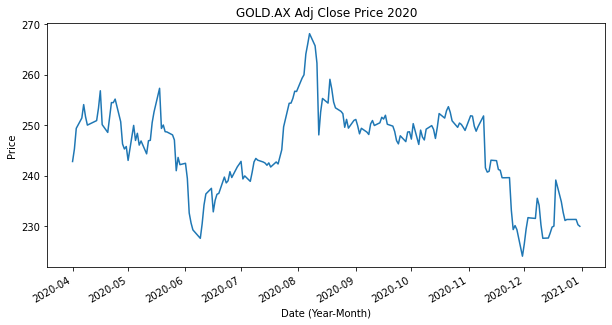

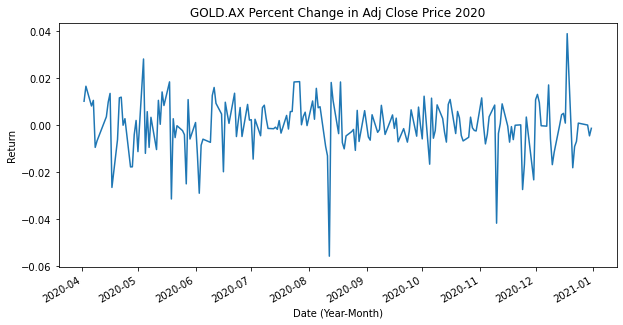

In [ ]:
# VISUALIZATION OF DAILY RETURN
ticker = "GOLD.AX"
 
adj_gdf['Adj Close'].plot(figsize=(10, 5), title=f'{ticker} Adj Close Price 2020')
plt.xlabel("Date (Year-Month)")
plt.ylabel("Price")
plt.show()
adj_gdf['daily_ret'].plot(figsize=(10, 5), title=f'{ticker} Percent Change in Adj Close Price 2020')
plt.xlabel("Date (Year-Month)")
plt.ylabel("Return")
plt.show()

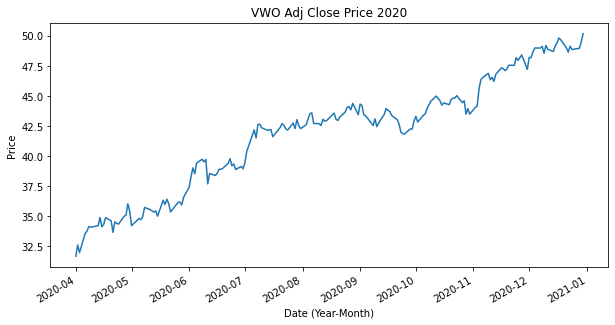

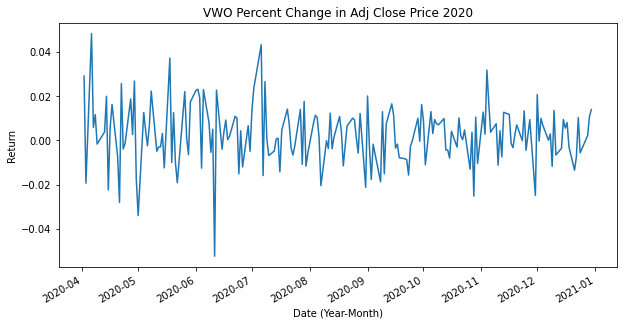

In [ ]:
ticker = "VWO"
 
adj_edf['Adj Close'].plot(figsize=(10, 5), title=f'{ticker} Adj Close Price 2020')
plt.xlabel("Date (Year-Month)")
plt.ylabel("Price")
plt.show()
adj_edf['daily_ret'].plot(figsize=(10, 5), title=f'{ticker} Percent Change in Adj Close Price 2020')
plt.xlabel("Date (Year-Month)")
plt.ylabel("Return")
plt.show()

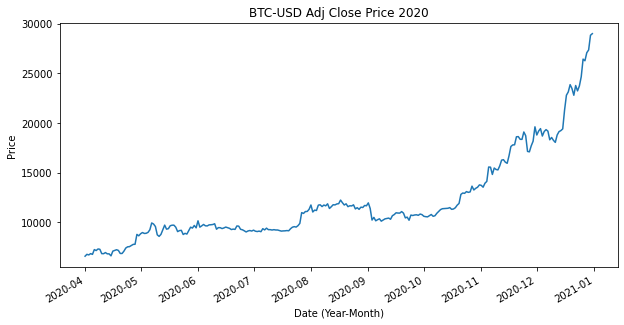

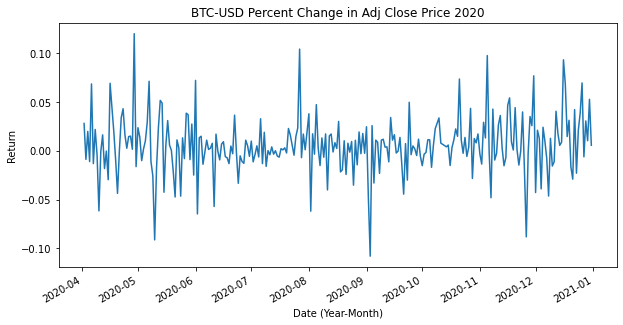

In [ ]:
ticker = "BTC-USD"
 
adj_bdf['Adj Close'].plot(figsize=(10, 5), title=f'{ticker} Adj Close Price 2020')
plt.xlabel("Date (Year-Month)")
plt.ylabel("Price")
plt.show()
adj_bdf['daily_ret'].plot(figsize=(10, 5), title=f'{ticker} Percent Change in Adj Close Price 2020')
plt.xlabel("Date (Year-Month)")
plt.ylabel("Return")
plt.show()

# Data Summaries

###Compute a 20-day moving average price of your GOLD ETF.  The moving average price on 1 April 2020 should include data from March.
### Compute a 20-day moving average price of your equity ETF.  The moving average price on 1 April 2020 should include data from March.
###Compute a 20-day moving average price of bitcoin.  The moving average price on 1 April 2020 should include data from March

In [ ]:
 
gdf1 = g20.loc['2020-03-01':]
edf1 = e20.loc['2020-03-01':]
bdf1 = b20.loc['2020-03-01':]

In [ ]:
 # COMPUTE DAILY RETURNS
 
#GOLD
adj_gdf1 = gdf1[['Adj Close']]
adj_gdf1['daily_ret'] = np.log(adj_gdf1['Adj Close']).diff()
 
#EQUITY
adj_edf1 = edf1[['Adj Close']]
adj_edf1['daily_ret'] = np.log(adj_edf1['Adj Close']).diff()
 
#BITCOIN
adj_bdf1 = bdf1[['Adj Close']]
adj_bdf1['daily_ret'] = np.log(adj_bdf1['Adj Close']).diff()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [ ]:
 
# SMA 20 DAYS:
# GOLD
adj_gdf1['c_SMA_20'] = adj_gdf1['Adj Close'].rolling(window=20).mean()
adj_gdf1['r_SMA_20'] = adj_gdf1['daily_ret'].rolling(window=20).mean()

# EQUITY
adj_edf1['c_SMA_20'] = adj_edf1['Adj Close'].rolling(window=20).mean()
adj_edf1['r_SMA_20'] = adj_edf1['daily_ret'].rolling(window=20).mean()
 
#BITCOIN
#adj_bdf1['c_SMA_20'] = adj_bdf1['Adj Close'].iloc[:,1].rolling(window=20).mean()
adj_bdf1['c_SMA_20'] = adj_bdf1['Adj Close'].rolling(window=20).mean()
adj_bdf1['r_SMA_20'] = adj_bdf1['daily_ret'].rolling(window=20).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [ ]:
print("gold:")
print(adj_gdf1.tail())
print("")

print("equity:")
print(adj_edf1.tail())
print("")

print("bitcoin:")
print(adj_bdf1.tail())

gold:
             Adj Close  daily_ret  c_SMA_20  r_SMA_20
Date                                                 
2020-12-23  231.149994  -0.006898  230.8165  0.000391
2020-12-24  231.350006   0.000865  230.8770  0.000262
2020-12-29  231.360001   0.000043  230.9775  0.000436
2020-12-30  230.309998  -0.004549  231.2890  0.001371
2020-12-31  230.000000  -0.001347  231.4630  0.000762

equity:
            Adj Close  daily_ret   c_SMA_20  r_SMA_20
Date                                                 
2020-12-23  49.136650   0.010215  48.789876  0.000987
2020-12-24  48.857006  -0.005707  48.834850  0.000929
2020-12-28  48.956879   0.002042  48.862482  0.000568
2020-12-29  49.486198   0.010754  48.976143  0.002351
2020-12-30  50.175312   0.013829  49.075120  0.002013

bitcoin:
               Adj Close  daily_ret      c_SMA_20  r_SMA_20
Date                                                       
2020-12-27  26272.294922  -0.006251  21767.354687  0.015702
2020-12-28  27084.808594   0.030458  22

# Graphing

###Graph each price series along with its moving average from April 2020 through Dec  on how the price series and average series intersect or not.
###Graph gold and equity prices on the same plot.  Use a separate scale for each series, and be sure to add a label and legend
###Graph gold and bitcoin prices on the same plot.  Use a separate scale for each series, and be sure to add a label and legend
###Graph equity and bitcoin prices on the same plot.  Use a separate scale for each series, and be sure to add a label and legend

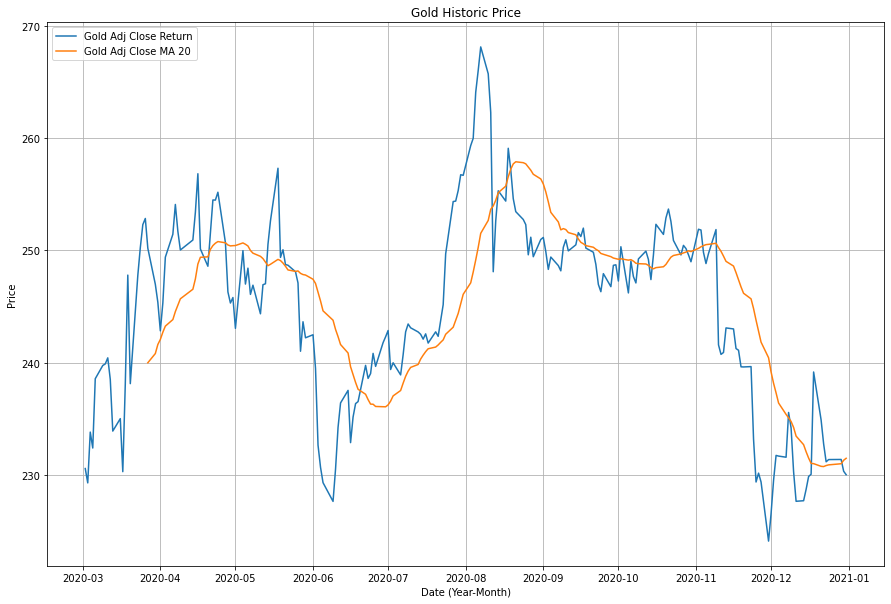

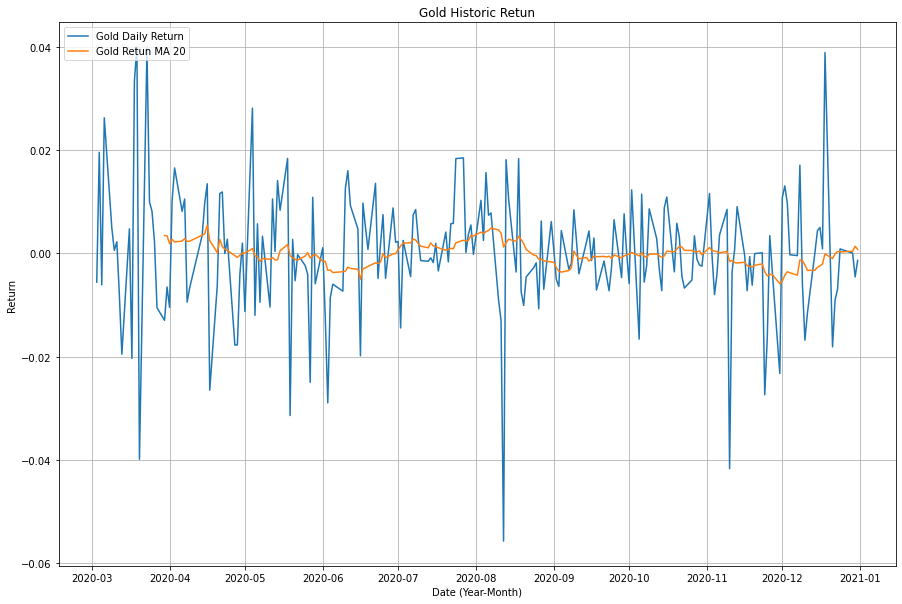

In [ ]:
# GRAPHING
# GRAPHING GOLD PRICE SERIES VS SMA 20
# GOLD
plt.figure(figsize=[15,10])
plt.grid(True)
plt.title("Gold Historic Price",size = 12)
plt.plot(adj_gdf1['Adj Close'], label = 'Gold Adj Close Return')
plt.plot(adj_gdf1['c_SMA_20'], label = 'Gold Adj Close MA 20')
plt.legend(loc=2)
plt.xlabel("Date (Year-Month)")
plt.ylabel("Price")
plt.show()

plt.figure(figsize=[15,10])
plt.grid(True)
plt.title("Gold Historic Retun",size = 12)
plt.plot(adj_gdf1['daily_ret'], label = 'Gold Daily Return')
plt.plot(adj_gdf1['r_SMA_20'], label = 'Gold Retun MA 20')
plt.legend(loc=2)
plt.xlabel("Date (Year-Month)")
plt.ylabel("Return")
plt.show()

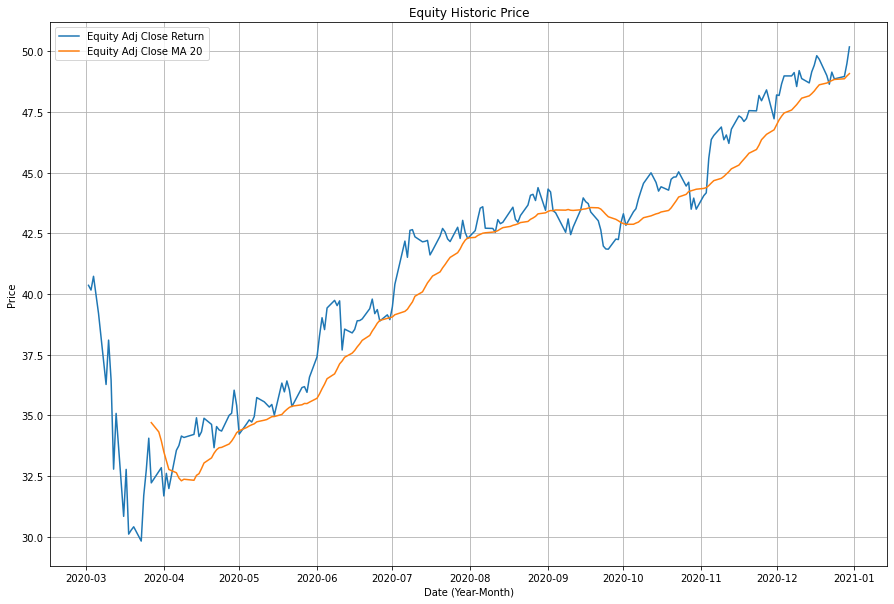

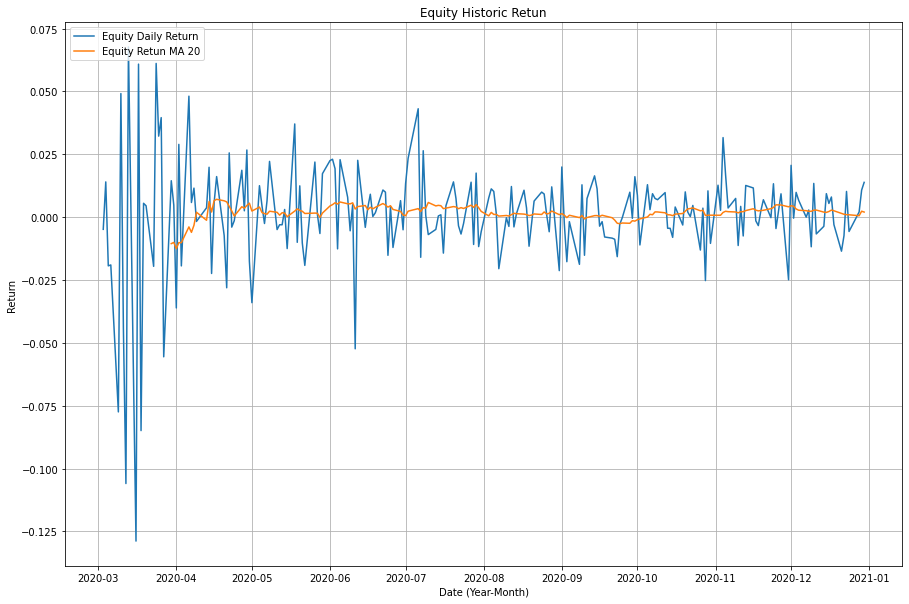

In [ ]:
# GRAPHING EQUITY PRICE SERIES VS SMA 20
# EQUITY
plt.figure(figsize=[15,10])
plt.grid(True)
plt.title("Equity Historic Price",size = 12)
plt.plot(adj_edf1['Adj Close'], label = 'Equity Adj Close Return')
plt.plot(adj_edf1['c_SMA_20'], label = 'Equity Adj Close MA 20')
plt.legend(loc=2)
plt.xlabel("Date (Year-Month)")
plt.ylabel("Price")
plt.show()

plt.figure(figsize=[15,10])
plt.grid(True)
plt.title("Equity Historic Retun",size = 12)
plt.plot(adj_edf1['daily_ret'], label = 'Equity Daily Return')
plt.plot(adj_edf1['r_SMA_20'], label = 'Equity Retun MA 20')
plt.legend(loc=2)
plt.xlabel("Date (Year-Month)")
plt.ylabel("Return")
plt.show()

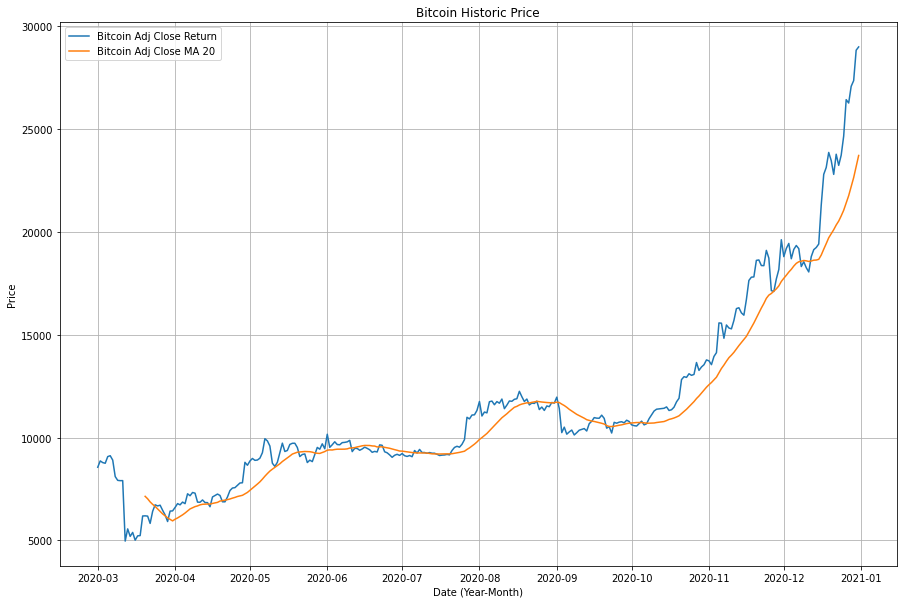

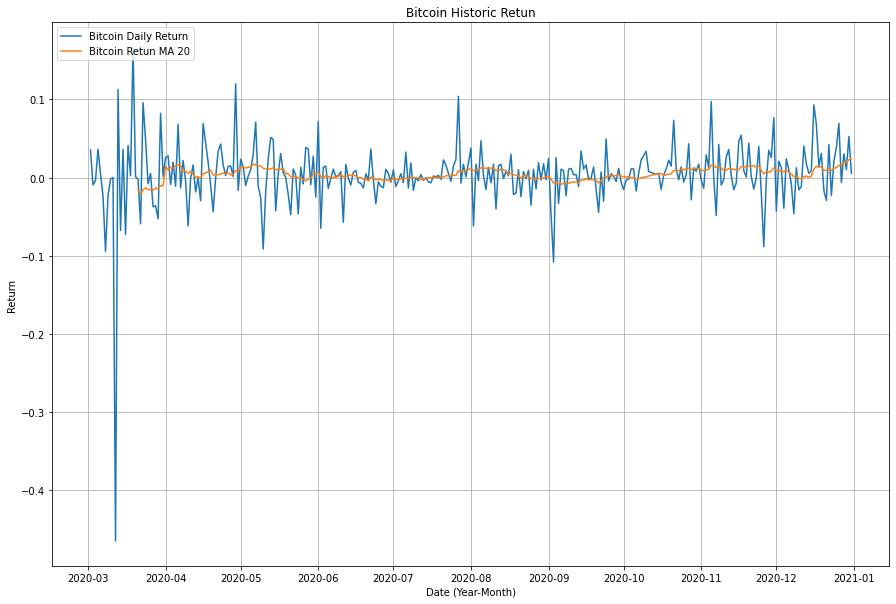

In [ ]:
 # GRAPHING BITCOIN PRICE SERIES VS SMA 20
# BITCOIN
plt.figure(figsize=[15,10])
plt.grid(True)
plt.title("Bitcoin Historic Price",size = 12)
plt.plot(adj_bdf1['Adj Close'], label = 'Bitcoin Adj Close Return')
plt.plot(adj_bdf1['c_SMA_20'], label = 'Bitcoin Adj Close MA 20')
plt.legend(loc=2)
plt.xlabel("Date (Year-Month)")
plt.ylabel("Price")
plt.show()

plt.figure(figsize=[15,10])
plt.grid(True)
plt.title("Bitcoin Historic Retun",size = 12)
plt.plot(adj_bdf1['daily_ret'], label = 'Bitcoin Daily Return')
plt.plot(adj_bdf1['r_SMA_20'], label = 'Bitcoin Retun MA 20')
plt.legend(loc=2)
plt.xlabel("Date (Year-Month)")
plt.ylabel("Return")
plt.show()

In general, the three series, gold, equity and bitcoin, show that the price's MA follows a similar but smoother behaviour among time. It is worth mentioning that the three MA seem to be lagged. When the price has a considerable drop or when the price soars, the MA presents the same movement but after some days.

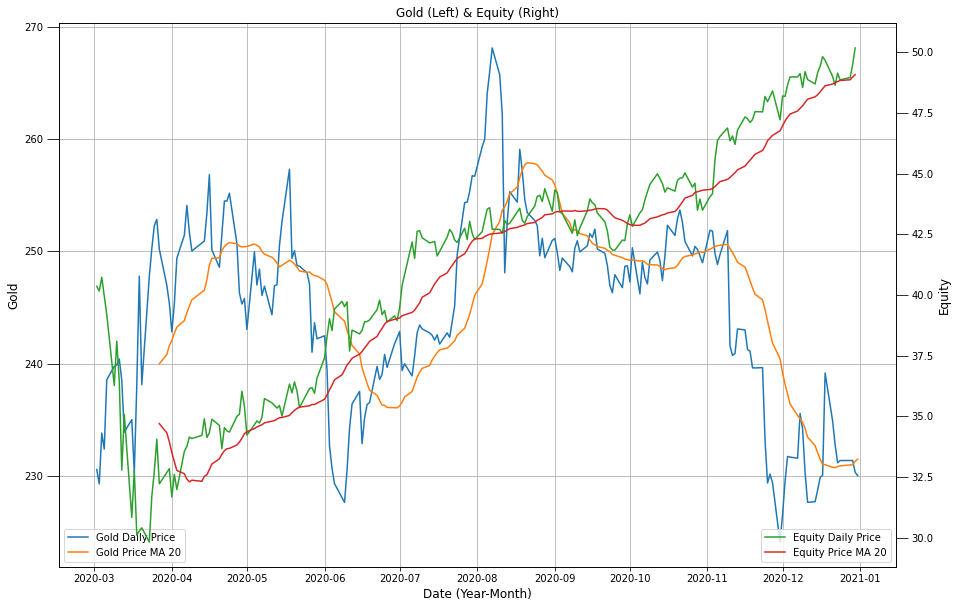

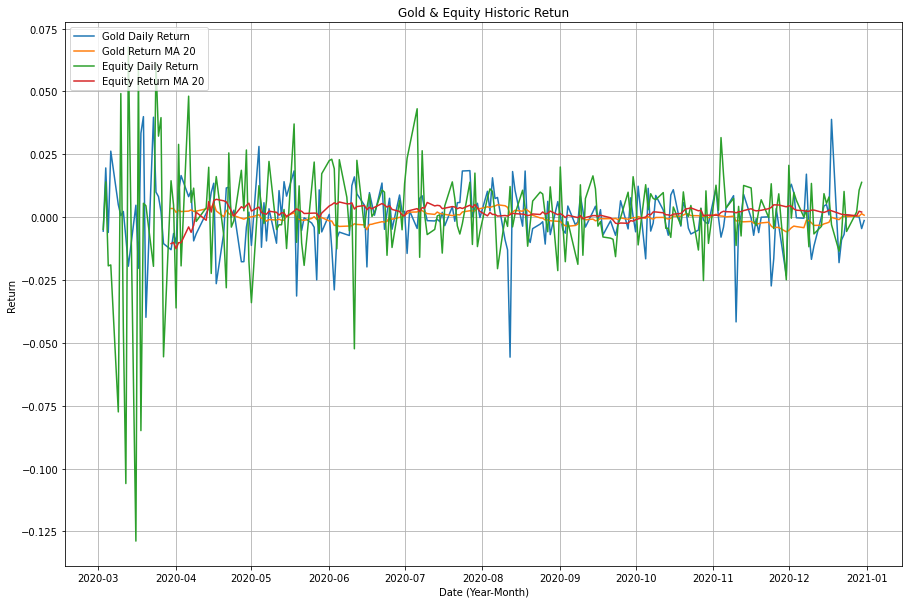

In [ ]:
# Graph gold and equity prices on the same plot.
fig, ax1 = plt.subplots(figsize=(15,10))
 
plt.title("Gold (Left) & Equity (Right)",size = 12)
plt.grid(True)

ax1.set_xlabel('Date (Year-Month)',size = 12)
ax1.set_ylabel('Gold',size = 12)
ax1.plot(adj_gdf1['Adj Close'],color='tab:blue', label = 'Gold Daily Price')
ax1.plot(adj_gdf1['c_SMA_20'],color='tab:orange',label = 'Gold Price MA 20')
ax1.tick_params(axis='y',size = 12)
 
ax2 = ax1.twinx()  # second axes that shares the same x-axis
ax2.set_ylabel('Equity',size = 12)  # we already handled the x-label with ax1
ax2.plot(adj_edf1['Adj Close'],color='tab:green', label = 'Equity Daily Price')
ax2.plot(adj_edf1['c_SMA_20'], color='tab:red',label = 'Equity Price MA 20') 
ax2.tick_params(axis='y',size = 12)
 
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc='lower left')
ax2.legend(loc='lower right')
fig.show()

plt.figure(figsize=[15,10])
plt.title("Gold & Equity Historic Retun",size = 12)
plt.grid(True)
plt.plot(adj_gdf1['daily_ret'], label = 'Gold Daily Return')
plt.plot(adj_gdf1['r_SMA_20'], label = 'Gold Return MA 20')
plt.plot(adj_edf1['daily_ret'], label = 'Equity Daily Return')
plt.plot(adj_edf1['r_SMA_20'], label = 'Equity Return MA 20') 
plt.legend(loc=2)
plt.xlabel("Date (Year-Month)")
plt.ylabel("Return")
plt.show()

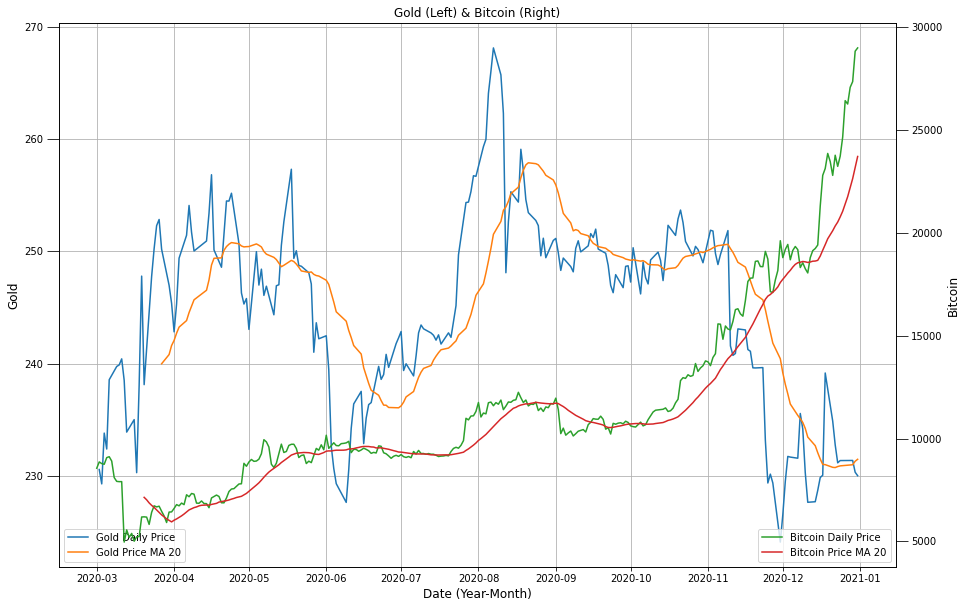

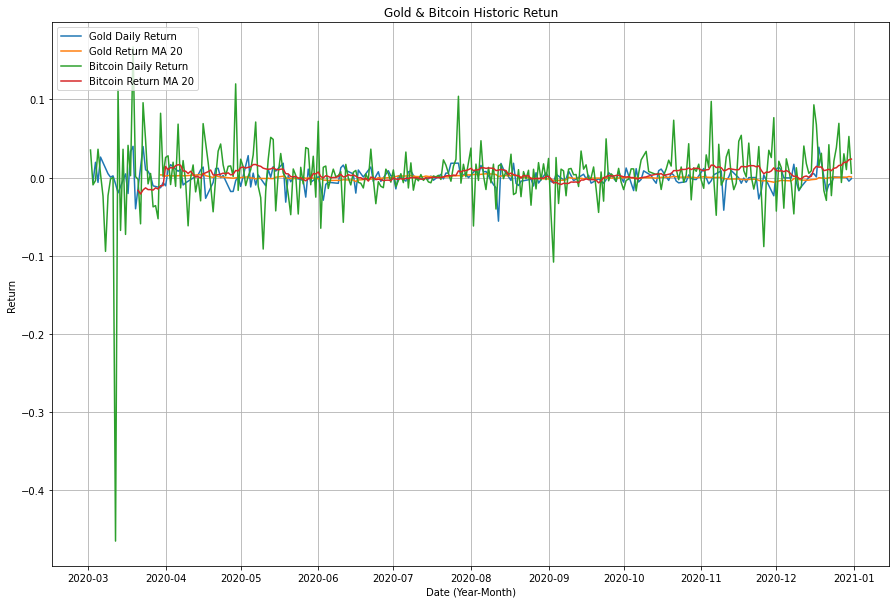

In [ ]:
# Graph gold and bitcoin prices on the same plot.
fig, ax1 = plt.subplots(figsize=(15,10))
 
plt.title("Gold (Left) & Bitcoin (Right)",size = 12)
plt.grid(True)

ax1.set_xlabel('Date (Year-Month)',size = 12)
ax1.set_ylabel('Gold',size = 12)
ax1.plot(adj_gdf1['Adj Close'],color='tab:blue', label = 'Gold Daily Price')
ax1.plot(adj_gdf1['c_SMA_20'],color='tab:orange',label = 'Gold Price MA 20')
ax1.tick_params(axis='y',size = 12)
 
ax2 = ax1.twinx()  # second axes that shares the same x-axis
ax2.set_ylabel('Bitcoin',size = 12)  # we already handled the x-label with ax1
ax2.plot(adj_bdf1['Adj Close'],color='tab:green', label = 'Bitcoin Daily Price')
ax2.plot(adj_bdf1['c_SMA_20'], color='tab:red',label = 'Bitcoin Price MA 20') 
ax2.tick_params(axis='y',size = 12)
 
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc='lower left')
ax2.legend(loc='lower right')
fig.show()

plt.figure(figsize=[15,10])
plt.title("Gold & Bitcoin Historic Retun",size = 12)
plt.grid(True)
plt.plot(adj_gdf1['daily_ret'], label = 'Gold Daily Return')
plt.plot(adj_gdf1['r_SMA_20'], label = 'Gold Return MA 20')
plt.plot(adj_bdf1['daily_ret'], label = 'Bitcoin Daily Return')
plt.plot(adj_bdf1['r_SMA_20'], label = 'Bitcoin Return MA 20')
plt.legend(loc=2)
plt.xlabel("Date (Year-Month)")
plt.ylabel("Return")
plt.show()


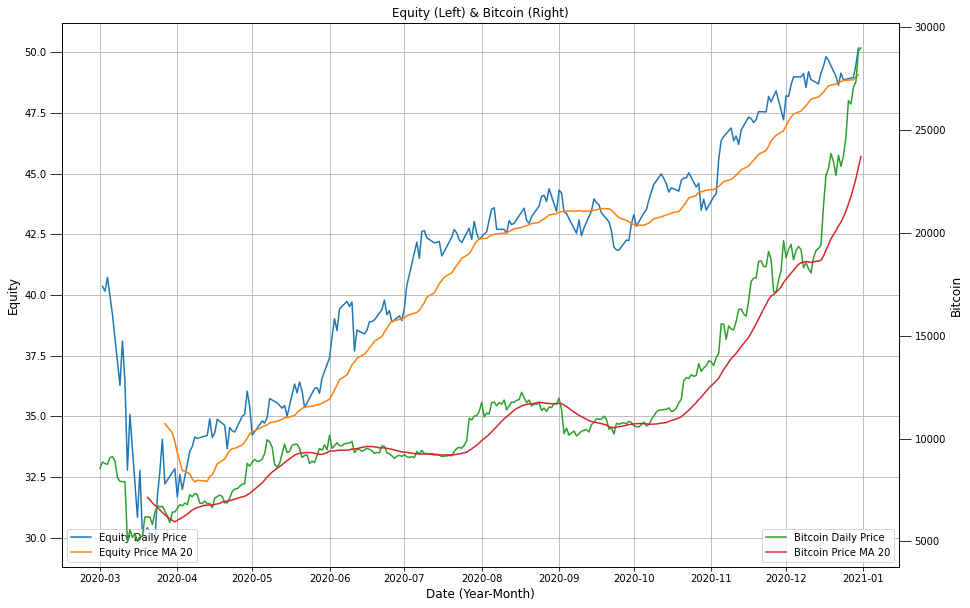

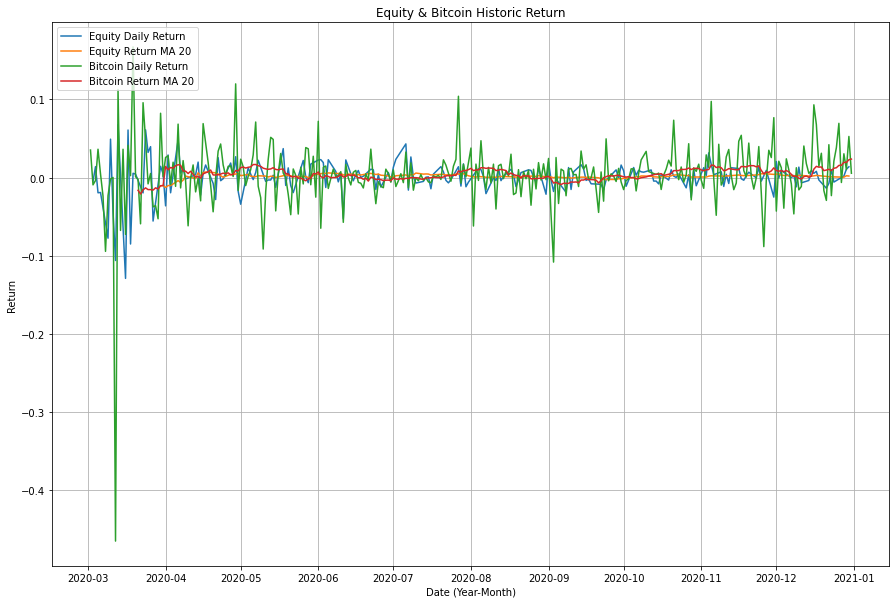

In [ ]:
# Graph bitcoin and equity prices on the same plot.
fig, ax1 = plt.subplots(figsize=(15,10))
 
plt.title("Equity (Left) & Bitcoin (Right)",size = 12)
plt.grid(True)

ax1.set_xlabel('Date (Year-Month)',size = 12)
ax1.set_ylabel('Equity',size = 12)
ax1.plot(adj_edf1['Adj Close'],color='tab:blue', label = 'Equity Daily Price')
ax1.plot(adj_edf1['c_SMA_20'],color='tab:orange',label = 'Equity Price MA 20')
ax1.tick_params(axis='y',size = 12)
 
ax2 = ax1.twinx()  # second axes that shares the same x-axis
ax2.set_ylabel('Bitcoin',size = 12)  # we already handled the x-label with ax1
ax2.plot(adj_bdf1['Adj Close'],color='tab:green', label = 'Bitcoin Daily Price')
ax2.plot(adj_bdf1['c_SMA_20'], color='tab:red',label = 'Bitcoin Price MA 20') 
ax2.tick_params(axis='y',size = 12)
 
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc='lower left')
ax2.legend(loc='lower right')
fig.show()

plt.figure(figsize=[15,10])
plt.title("Equity & Bitcoin Historic Return",size = 12)
plt.grid(True)
plt.plot(adj_edf1['daily_ret'], label = 'Equity Daily Return')
plt.plot(adj_edf1['r_SMA_20'], label = 'Equity Return MA 20')
plt.plot(adj_bdf1['daily_ret'], label = 'Bitcoin Daily Return')
plt.plot(adj_bdf1['r_SMA_20'], label = 'Bitcoin Return MA 20')
plt.legend(loc=2)
plt.xlabel("Date (Year-Month)")
plt.ylabel("Return")
plt.show()

# Fitting a GARCH Model

###Pick one of the 3 series (gold, equity, or bitcoin).  
###Fit a GARCH model for Q2.  
###Fit a GARCH model for Q3.  
###Fit a GARCH model for Q4
###Repeat the process, but instead using GARCH-M Model
###Repeat the process one more time, using another variation of GARCH (e.g. Threshold GARCH, Exponential GARCH, Integrated GARCH)
###What are the 3 long-term variances indicated by the models

In [7]:
import os
import pandas as pd
import numpy as np
import random
import itertools
from arch import arch_model
from scipy.stats import shapiro
from scipy.stats import probplot
from statsmodels.stats.diagnostic import het_arch
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
 
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight') 
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
%matplotlib inline

In [8]:
# QUARTER 2, Equity: DATES: 01-04-2020 till 2020-06-30
# QUARTER 3, Bitcoin: DATES: 01-07-2020 till 2020-09-30
# QUARTER 4, Gold: DATES: 01-10-2020 till 2020-12-31 
 
Q2_gdf = g20.loc['2020-04-01': '2020-06-30']
Q3_gdf = g20.loc['2020-07-01' : '2020-09-30']
Q4_gdf = g20.loc['2020-10-01' : '2020-12-31']

In [ ]:
print("Q2 Gold:")
print(Q2_gdf.tail())
print("")
print("Q3 Gold:")
print(Q3_gdf.tail())
print("")
print("Q4 Gold:")
print(Q4_gdf.tail())

Q2 Gold:
                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2020-06-24  238.839996  239.460007  238.690002  239.020004  239.020004   47717
2020-06-25  240.789993  241.419998  240.270004  240.820007  240.820007   53271
2020-06-26  240.539993  240.940002  239.259995  239.660004  239.660004   30915
2020-06-29  241.970001  242.600006  241.130005  241.779999  241.779999   34707
2020-06-30  242.119995  242.529999  241.399994  242.300003  242.300003   21928

Q3 Gold:
                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2020-09-24  246.139999  247.479996  246.009995  246.320007  246.320007   42149
2020-09-25  247.889999  248.289993  247.190002  247.929993  247.929993   23754
2020-09-28  247.839996  247.839996  246.690002  246.770004  246.770004   20162
2020-09-29  248.699997  249.63000

In [9]:
 def ts_plot(residuals, stan_residuals, lags=50):
    residuals.plot(title='GARCH Residuals', figsize=(15, 10))
    plt.show()
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    ax[0].set_title('GARCH Standardized Residuals KDE')
    ax[1].set_title('GARCH Standardized Resduals Probability Plot')    
    residuals.plot(kind='kde', ax=ax[0])
    probplot(stan_residuals, dist='norm', plot=ax[1])
    plt.show()
    acf = plot_acf(stan_residuals, lags=lags)
    pacf = plot_pacf(stan_residuals, lags=lags)
    acf.suptitle('GARCH Model Standardized Residual Autocorrelation', fontsize=20)
    acf.set_figheight(5)
    acf.set_figwidth(15)
    pacf.set_figheight(5)
    pacf.set_figwidth(15)
    plt.show()

## GARCH models for Q2

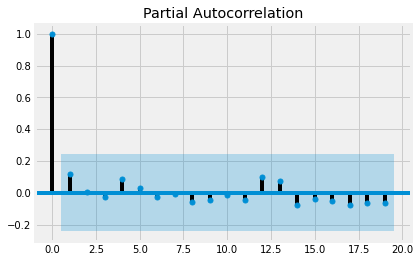

In [12]:
Q2_gdf = Q2_gdf[['Adj Close']]
Q2_gdf['daily_ret'] = np.log(Q2_gdf['Adj Close']).diff()
Q2_gdf['daily_ret^2'] = Q2_gdf['daily_ret']**2
 
# DROP NA CREATED ABOVE
Q2_gdf.dropna(inplace=True)
 
# PLOT PACF OF SQUARED RETURNS
plot_pacf(Q2_gdf['daily_ret^2'])
plt.show()
 
# CREATE GARCH(1,1) model for Q4: 
q2_garch = arch_model(Q2_gdf['daily_ret'], p = 1, q = 1, mean = 'constant', vol = 'GARCH', dist = 'normal',rescale=False)

## GARCH models for Q3

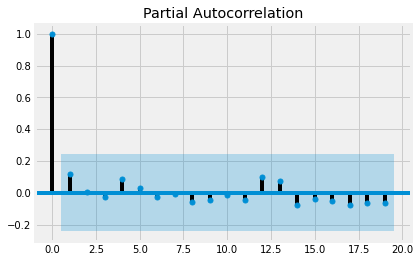

In [14]:
Q3_gdf = Q3_gdf[['Adj Close']]
Q3_gdf['daily_ret'] = np.log(Q3_gdf['Adj Close']).diff()
Q3_gdf['daily_ret^2'] = Q3_gdf['daily_ret']**2
 
# DROP NA CREATED ABOVE
Q3_gdf.dropna(inplace=True)
 
# PLOT PACF OF SQUARED RETURNS
plot_pacf(Q3_gdf['daily_ret^2'])
plt.show()
 
# CREATE GARCH(1,1) model for Q4: 
q3_garch = arch_model(Q3_gdf['daily_ret'], p = 1, q = 1, mean = 'constant', vol = 'GARCH', dist = 'normal',rescale=False)

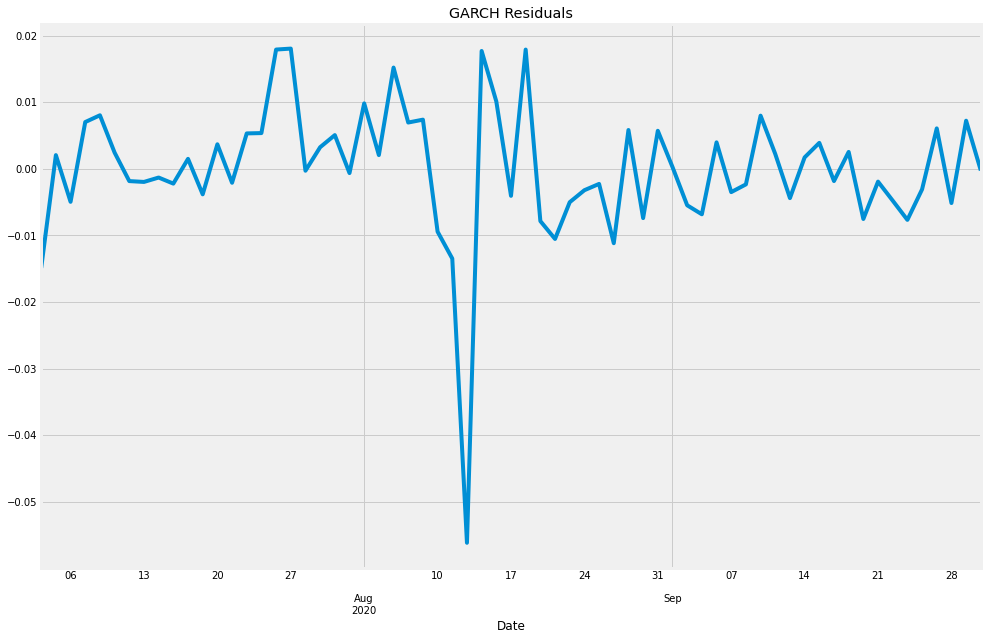

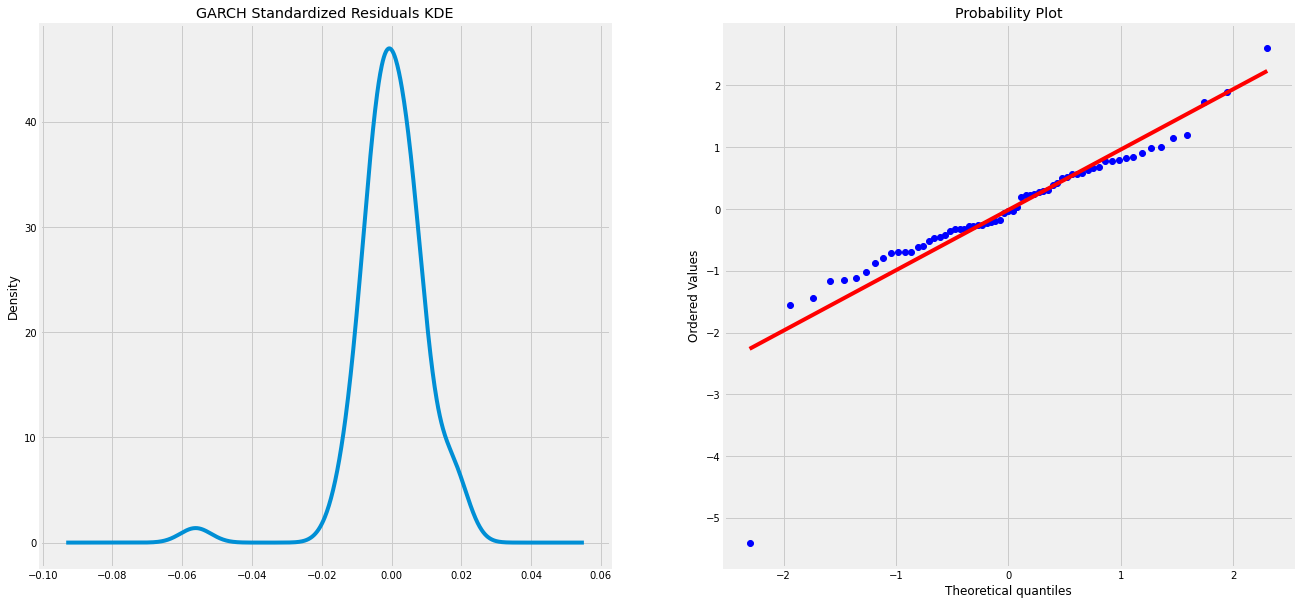

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


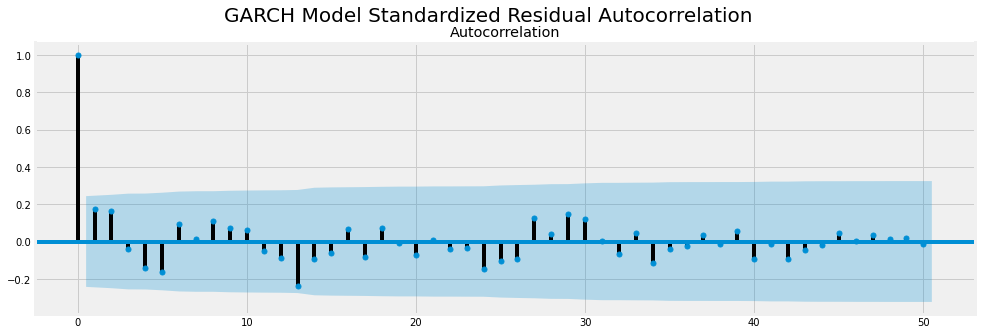

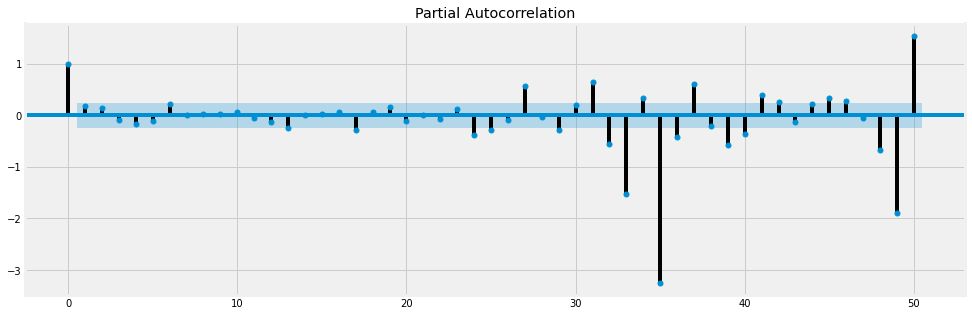

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              daily_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                212.010
Distribution:                  Normal   AIC:                          -416.021
Method:            Maximum Likelihood   BIC:                          -407.323
                                        No. Observations:                   65
Date:                Tue, Apr 13 2021   Df Residuals:                       64
Time:                        06:03:27   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         4.5778e-04  8.577e-04      0.534      0.594 [-1.223e-03,2.139e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.0338e-05  1.269e-09   8147.011      0.000 [1.034e-05,1.034e-05]
alpha[1]       0.2000      0.236      0.847      0.397     [ -0.263,  0.663]
beta[1]        0.7000      0.137      5.101  3.375e-07     [  0.431,  0.969]
============================================================================

Covariance estimator: robust
"""

In [15]:
# FIT GARCH MODEL & PLOT & SUMMARY
fgarch = q3_garch.fit(disp='off') 
resid = fgarch.resid
st_resid = np.divide(resid, fgarch.conditional_volatility)
ts_plot(resid, st_resid)
fgarch.summary()

The results suggest that the $\beta$ is not statistical significant and that we should fit an ARCH(1,0) model instead.




## GARCH models for Q4

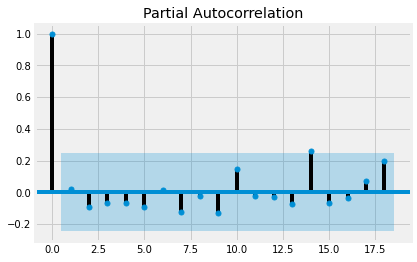

In [16]:
# CREATE 'Q4 RETURN' COLUMN
Q4_gdf = Q4_gdf[['Adj Close']]
Q4_gdf['daily_ret'] = np.log(Q4_gdf['Adj Close']).diff()
Q4_gdf['daily_ret^2'] = Q4_gdf['daily_ret']**2
 
# DROP NA CREATED ABOVE
Q4_gdf.dropna(inplace=True)
 
# PLOT PACF OF SQUARED RETURNS
plot_pacf(Q4_gdf['daily_ret^2'])
plt.show()
 
# CREATE GARCH(1,1) model for Q4: 
q4_garch = arch_model(Q4_gdf['daily_ret'], p = 1, q = 1, mean = 'constant', vol = 'GARCH', dist = 'normal')

/usr/local/lib/python3.7/dist-packages/arch/univariate/base.py:317: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001268. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


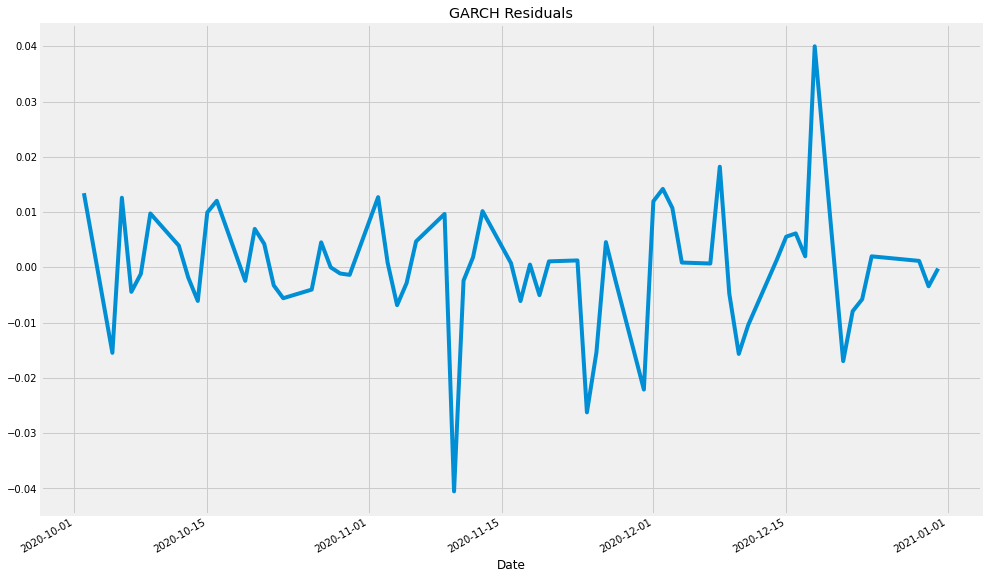

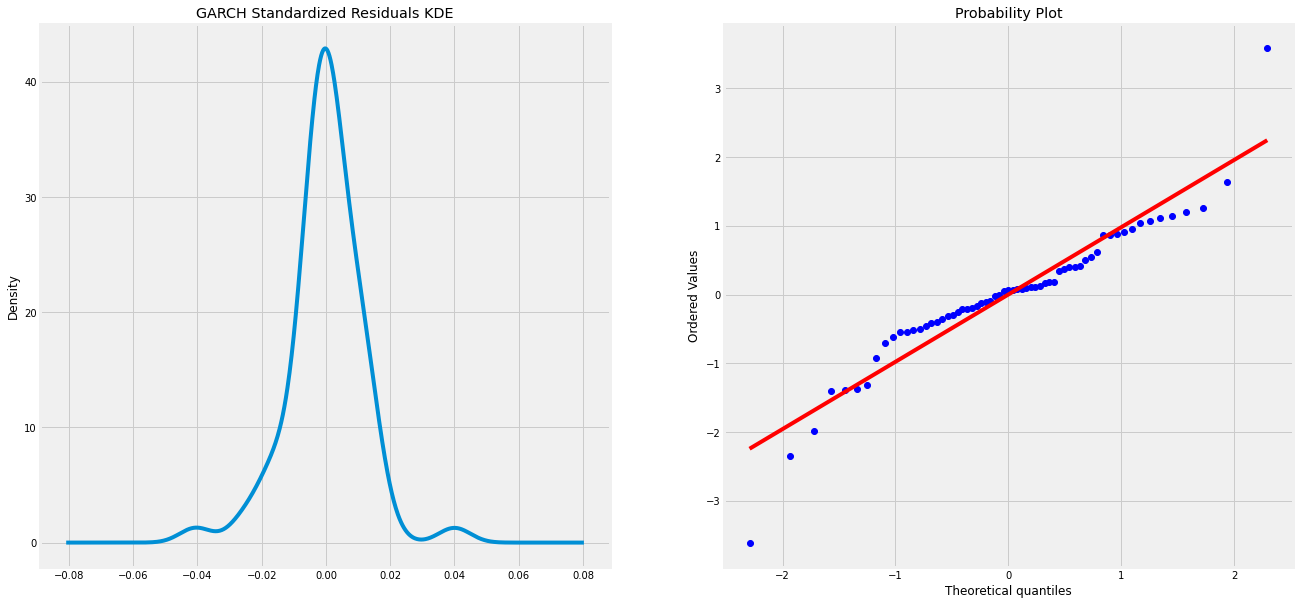

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


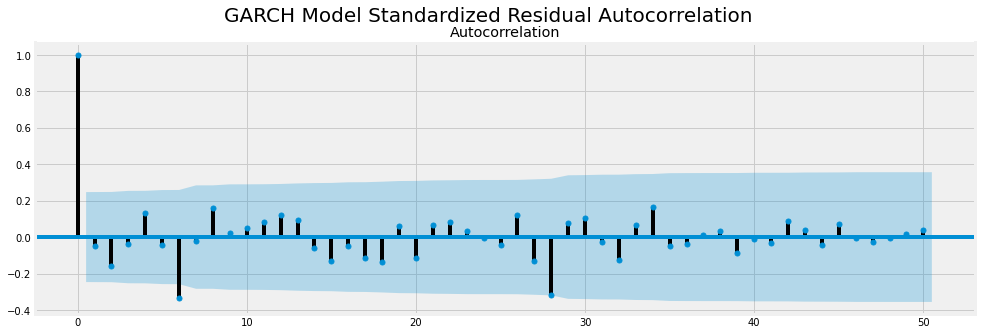

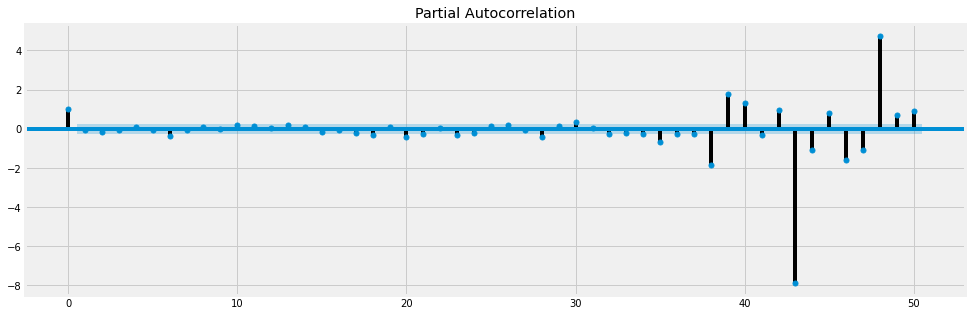

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              daily_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                193.266
Distribution:                  Normal   AIC:                          -378.533
Method:            Maximum Likelihood   BIC:                          -369.960
                                        No. Observations:                   63
Date:                Tue, Apr 13 2021   Df Residuals:                       62
Time:                        06:04:14   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -1.1250e-03  2.001e-03     -0.562      0.574 [-5.046e-03,2.796e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.2475e-04  1.166e-03      0.107      0.915 [-2.161e-03,2.411e-03]
alpha[1]       0.0162      1.214  1.332e-02      0.989      [ -2.363,  2.396]
beta[1]        0.0000     10.660      0.000      1.000      [-20.892, 20.892]
=============================================================================

Covariance estimator: robust
"""

In [17]:
# FIT GARCH MODEL & PLOT & SUMMARY
fgarch = q4_garch.fit(disp='off') 
resid = fgarch.resid
st_resid = np.divide(resid, fgarch.conditional_volatility)
ts_plot(resid, st_resid)
fgarch.summary()

In [18]:
 # PRINT THE RESULTS
print(fgarch.params)

mu         -0.001125
omega       0.000125
alpha[1]    0.016168
beta[1]     0.000000
Name: params, dtype: float64


 
 
We can see a couple of things in the regression output:
 
The **beta** coefficient is 0.89; this coefficient is our MA term. If it was greater than 1, we would have a big problem. Essentially, when the beta is bigger than 1, a slight shock will grow and get louder and louder over time. In the mean, this is not a big deal; but in the variance of an estimator, we would see a spiral to ever greater levels until it hits infinity. Therefore, doing a regression would be impossible. We want the beta to be less than 1 in absolute value in terms of our model's volatility but should not take this term in isolation. Even though the AR term has a similar effect, most of the persistence should be captured in beta.
 
**omega** is the baseline variance for the model. We can think of omega as the variance if information about past variances were not passed to the model. Therefore, the square root of omega would be the standard deviation in returns. This coefficient suggests that the standard deviation of returns should be around 0.35% per day.
 
Finally, the **alpha** term tells us how much of the previous period's volatility adds to today's volatility. It turns out that we shouldn't expect too much clumping to be going on. According to this, only about 1% of the previous days' volatility will be carried over into the next day. 
 
Adding alpha with the beta coefficient approximately sums 90%. If it were 100%, we would have a random walk. Moreover, it takes a long time for a volatility regime to dissipate. Therefore, if we have a period of low volatility, it will persist for quite some time. We expect that our returns (loss) will be about -0.096% per day, as indicated by the **mu** coefficient over this period.
 
We can calculate the Value at Risk (VaR) 30 days from now. To do that, we need to simulate the process into the future. We can do that with the following code:

In [ ]:
 
forecasts = fgarch.forecast(horizon=30, method='simulation', simulations=1000)
sims = forecasts.simulations

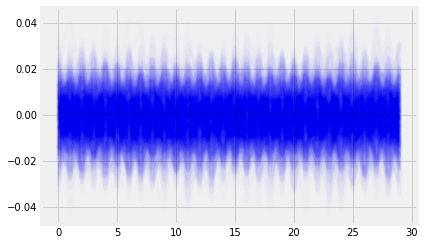

In [20]:
 lines = plt.plot(sims.values[-1,:,:].T, color='blue', alpha=0.01)
lines[0].set_label('Simulated paths')
plt.show()

The output let’s us preview the simulation results. Darker regions are more likely, lighter regions are less likely paths. It’s interesting because we can see that there are definitely days that are expected to have low volatility and days that we expect higher volatility.
 
Transposed (turned 90%) of the above will be a histogram so let's create one below.

-0.019194673126650165


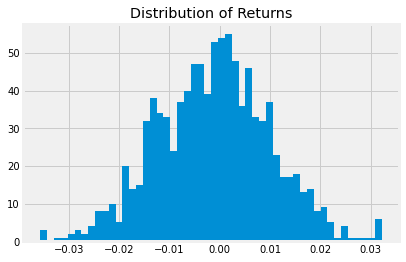

In [21]:
 print(np.percentile(sims.values[-1,:,-1].T,5))
plt.hist(sims.values[-1, :,-1],bins=50)
plt.title('Distribution of Returns')
plt.show()

### Repeat the process: GARCH-M Model
 
GARCH-M: This is GARCH in Mean, which is suitable if you have volatility in the mean equation (e.g. CAPM has σ in the equation)

### USING R

In [22]:
 %load_ext rpy2.ipython

In [ ]:
%%R
install.packages("rugarch")

In [ ]:
%%R
install.packages("quantmod")

In [ ]:
%%R
library(devtools)
library(rugarch)
library(quantmod)
library(parallel)
library(xts)
library(zoo)
library(TTR)

In [ ]:
%%R
# GET SYMBOLS DATA
getSymbols("GOLD.AX", from='2020-10-01', to='2020-12-31')

[1] "GOLD.AX"


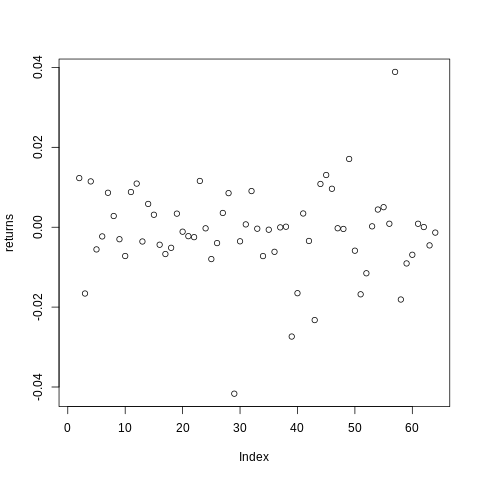

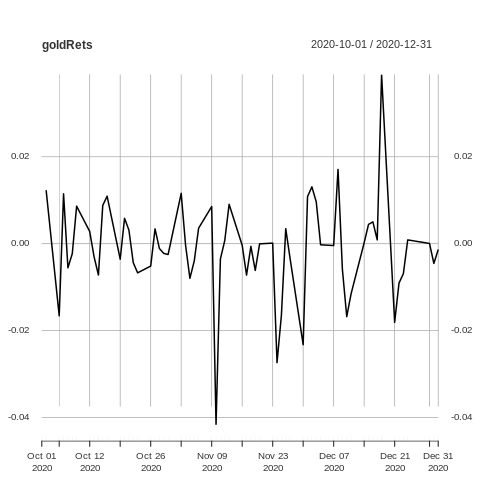

In [ ]:
 %%R
# CREATE RETURNS
goldRets = diff( log( Cl( GOLD.AX ) ) )
returns = as.numeric(goldRets)
plot(returns)
plot(goldRets)

It is very clear that there are periods of significant increases in volatility, particularly around November 9 and December 21.

In [ ]:
%%R
#REMOVE THE NA CREATED IN DIFF
gold4 <- as.numeric(goldRets)
gold4 <- gold4[!is.na(gold4)]

In [ ]:
%%R
# Converting into numeric matrix 
 
gold4 <- data.matrix(gold4)

The next task is to fit a suitable GARCH-M model.

In [ ]:
 
%%R
#GARCH specification
 
garchspec<- ugarchspec(variance.model = list(model = "fGARCH", garchOrder = c(1, 1), 
                       submodel = "GARCH", external.regressors = NULL, 
                       variance.targeting = FALSE), 
                       mean.model = list(armaOrder = c(0, 0), include.mean = TRUE,
                       archm = TRUE, archpow = 1, arfima = FALSE, 
                       external.regressors = NULL, archex = FALSE), 
                       distribution.model = "norm",
                       start.pars = list(), fixed.pars = list())
 
#fitting
fit<-ugarchfit(spec=garchspec, data=gold4[,1], out.sample = 0,solver="solnp",
               solver.control = list(trace=0), fit.control = 
               list(stationarity = 1, fixed.se = 0, scale = 0, rec.init = 0.7))
show(fit)


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: fGARCH(1,1)
fGARCH Sub-Model	: GARCH
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001772    0.003941  0.44953  0.65305
archm  -0.243723    0.346104 -0.70419  0.48131
omega   0.000001    0.000004  0.12042  0.90415
alpha1  0.000000    0.071196  0.00000  1.00000
beta1   0.999000    0.054036 18.48758  0.00000

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.001772    0.010368  0.170880 0.864318
archm  -0.243723    1.011554 -0.240939 0.809602
omega   0.000001    0.000035  0.014574 0.988372
alpha1  0.000000    0.656766  0.000000 1.000000
beta1   0.999000    0.498724  2.003112 0.045165

LogLikelihood : 193.4029 

Information Criteria
----------------------

 
 
### Repeat the process: Exponential GARCH Model
 
**EGARCH Model** 

The EGARCH model was proposed by Nelson (1991). Nelson and Cao (1992) argue that the nonnegativity constraints in the linear GARCH model are too restrictive. The GARCH model imposes the nonnegative constraints on the parameters,  γ and α, while there are no restrictions on these parameters in the EGARCH model.

In [23]:
# EXPONENTIAL GARCH
# Repeat the process: Exponential GARCH
q4_egarch = arch_model(Q4_gdf['daily_ret'], p = 1, q = 1, mean = 'constant', vol = 'EGARCH', dist = 'normal')
 
# GET THE RESULTS OF EGARCH
Q4_egarch_result = q4_egarch.fit(update_freq = 4)

Iteration:      4,   Func. Count:     36,   Neg. LLF: -195.66128262930778
Iteration:      8,   Func. Count:     68,   Neg. LLF: -198.6043883781992
Iteration:     12,   Func. Count:     99,   Neg. LLF: -202.65415972225023
Iteration:     16,   Func. Count:    130,   Neg. LLF: -203.6788710957558
Iteration:     20,   Func. Count:    155,   Neg. LLF: -204.888665527772
Iteration:     24,   Func. Count:    181,   Neg. LLF: -205.35872492881757
Iteration:     28,   Func. Count:    208,   Neg. LLF: -205.79613756644653
Iteration:     32,   Func. Count:    235,   Neg. LLF: -206.51258182879224
Iteration:     36,   Func. Count:    271,   Neg. LLF: -206.6318902247355
Iteration:     40,   Func. Count:    296,   Neg. LLF: -206.90319664242227
Iteration:     44,   Func. Count:    335,   Neg. LLF: -207.10694996899144
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -207.1069730052058
            Iterations: 44
            Function evaluations: 346
            Grad

/usr/local/lib/python3.7/dist-packages/arch/univariate/base.py:317: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001268. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


In [24]:
 # PRINT THE RESULTS SUMMARY
print(Q4_egarch_result.summary)

<bound method ARCHModelResult.summary of                      Constant Mean - EGARCH Model Results                     
Dep. Variable:              daily_ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:                207.107
Distribution:                  Normal   AIC:                          -406.214
Method:            Maximum Likelihood   BIC:                          -397.641
                                        No. Observations:                   63
Date:                Tue, Apr 13 2021   Df Residuals:                       62
Time:                        06:05:48   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         


# Assessing stationarity

###Pick 1 of the 3 quarters in 2020 (Q2, Q3, or Q4). 
###Test your gold ETF for stationarity.  Explicitly state which test you used to determine stationarity
###Using the same quarter, test your equity ETF for stationarity.  Explicitly state which test you used to determine stationarity
###Using the same quarter, test Bitcoin for stationarity.  Explicitly state which test you used to determine stationarity

###  Test Q2 Equity, Bitcoin and Gold for stationarity. Augmented Dickey-Fuller test used to determine stationarity.

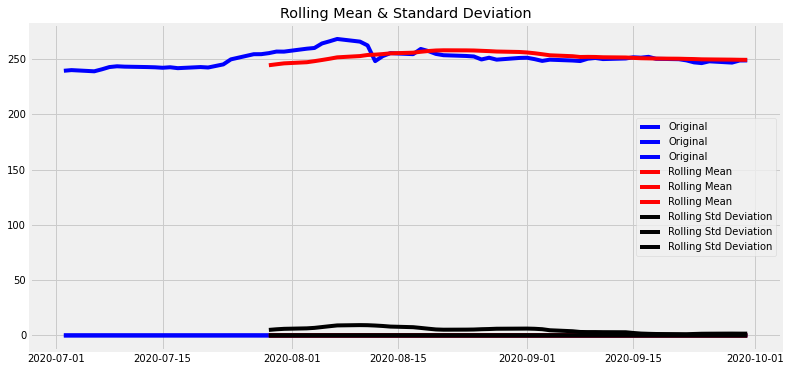

In [25]:
# Using ADF, Test gold ETF for stationarity
g_rolmean=Q2_gdf.rolling(20).mean()
g_rolstd=Q2_gdf.rolling(20).std()
 
# PLOTTING 
plt.figure(figsize=(12,6))
orig = plt.plot(Q2_gdf, color = 'blue', label = 'Original')
mean = plt.plot(g_rolmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(g_rolstd, color = 'black', label = 'Rolling Std Deviation')
plt.title('Rolling Mean & Standard Deviation')
plt.legend(loc = 'best')
plt.show(block = False)

In [27]:
 from statsmodels.tsa.stattools import adfuller
 from arch.unitroot import ADF

In [ ]:
Q2_edf = e20.loc['2020-04-01': '2020-06-30']
Q2_bdf = b20.loc['2020-04-01' : '2020-06-30']
Q2_gdf = g20.loc['2020-04-01' : '2020-06-30']
 
Q2_edf['daily_ret'] = np.log(Q2_edf['Adj Close']).diff()
Q2_edf['daily_ret^2'] = Q2_edf['daily_ret']**2
 
Q2_bdf['daily_ret'] = np.log(Q2_bdf['Adj Close']).diff()
Q2_bdf['daily_ret^2'] = Q2_bdf['daily_ret']**2
 
Q2_gdf['daily_ret'] = np.log(Q2_gdf['Adj Close']).diff()
Q2_gdf['daily_ret^2'] = Q2_gdf['daily_ret']**2
 
# DROP NA CREATED ABOVE
Q2_edf.dropna(inplace=True)
Q2_bdf.dropna(inplace=True)
Q2_gdf.dropna(inplace=True)

In [28]:
#AUGMENTED DICKEY-FULLER TEST:
print("Equity ADF Test 1:")
adf = ADF(Q2_edf['daily_ret'])
e_adftest = sm.tsa.adfuller(Q2_edf['daily_ret'], autolag = 'AIC')
print(e_adftest)
print("Equity ADF Test 2:")
print(adf.summary)
print("")
 
print("Bitcoin ADF Test 1:")
adf = ADF(Q2_bdf['daily_ret'])
b_adftest = sm.tsa.adfuller(Q2_bdf['daily_ret'], autolag = 'AIC')
print(b_adftest)
print("Bitcoin ADF Test 2:")
print(adf.summary)
print("")
 
print("Gold ADF Test 1:")
adf = ADF(Q2_gdf['daily_ret'])
g_adftest = sm.tsa.adfuller(Q2_gdf['daily_ret'], autolag = 'AIC')
print(g_adftest)
print("Gold ADF Test 2:")
print(adf.summary)
print("")

Equity ADF Test 1:
(-10.562116707445673, 7.680499087451202e-19, 0, 61, {'1%': -3.542412746661615, '5%': -2.910236235808284, '10%': -2.5927445767266866}, -266.7062199678069)
Equity ADF Test 2:
<bound method UnitRootTest.summary of <class 'arch.unitroot.unitroot.ADF'>
"""
   Augmented Dickey-Fuller Results   
Test Statistic                -10.562
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.54 (1%), -2.91 (5%), -2.59 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
""">

Bitcoin ADF Test 1:
(-9.91895192888966, 3.026857987291985e-17, 0, 88, {'1%': -3.506944401824286, '5%': -2.894989819214876, '10%': -2.584614550619835}, -304.7982882696963)
Bitcoin ADF Test 2:
<bound method UnitRootTest.summary of <class 'arch.unitroot.unitroot.ADF'>
"""
   Augmented Dickey-Fuller Results   
Test Statistic                 -9.919
P-value 

## Interpretation of the ADF Test 1 results
 
* The first value is the calculated test-statistic
* The second value is the p-value
* The thrid value is the number of lags used
* The fourth is the number of data points in the sample. 
* The fifth value, the dictionary, contains the critical values of the test-statistic at the 1, 5 and 10 percent values respectively

With respect test value obtained for the Equity and Bitcoin, we can observe that both are more negative than the critical value of 1% of -3.54 and -3.51, respectively. Therefore we reject the null hypothesis against the alternative of stationarity.

On the other hand, the Gold test value is less negative than the critical values at the 1% and 5%. It lays in between the 5% and 10% critical values. Therefore, we cannot reject the null hypothesis of $\gamma=0$ and thus is unlikely to have found a mean reverting time series.
 
Furthermore, the Augmented Dickey-Fuller test statistic is not very low, providing a not so low p-value and hence evidence to not reject the null hypothesis of a unit root and thus not enough evidence that we have a stationary series formed from a linear combination.

# Model Cointegration

###Using Q2 data, Test all the 3 combinations of cointegration using Engle-Granger.
###Are there any cointegrating vectors?
 
###If yes, run a Vector Error Correction Model and interpret the results.  
###If no, re-test for cointegration using Engle-Granger.
###Using Q3 data, Test all the 3 combinations of cointegration using Engle-Granger.
###Are there any cointegrating vectors?
###If yes, run a Vector Error Correction Model.  

###If any 2 sets are cointegrated, Do the results from Q2 cointegration testing help predict the coefficients from Q3 cointegration?

###If no 2 sets are cointegrated, use the Johannsen test for cointegration and repeat the questions.

###What are the significant changes, if any?  Be specific with regards to the values of the parameters!

 
The Engle-Granger Two-Step method starts by creating residuals based on the static regression and then testing the residuals for the presence of unit roots. It uses the Augmented Dickey-Fuller Test (ADF) or other tests to test for stationarity units in time series. If the time series is cointegrated, the Engle-Granger method will show the stationarity of the residuals.

 
In the previous cells we noted that one of the biggest drawbacks of the ADF test was that it was only capable of being applied to two separate time series. 
 
The Johansen test is a test for cointegration that allows for more than one cointegrating relationship, unlike the Engle–Granger method, but this test is subject to asymptotic properties, i.e. large samples. If the sample size is too small then the results will not be reliable and one should use Auto Regressive Distributed Lags (ARDL).

In [29]:
# Import Statsmodels Cointegration 
from statsmodels.tsa.stattools import coint
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot')
 
#Get stocks
asset=['GOLD.AX','VWO','BTC-USD']
 
#Get the stock/portfolio starting date
stockStartDate='2020-04-01'
 
#Get the stock/portfolio end date
today='2020-12-30'
 
#Create dataframe to store the stocks
df=pd.DataFrame()
 
#Store the adjusted close price of the stock into df
for stock in asset:
    df[stock]=web.DataReader(stock,data_source='yahoo', start=stockStartDate,end=today)['Adj Close']
 
df.dropna(inplace=True)
 
df.describe()
Q2_df= df.loc['2020-04-01': '2020-06-30']
Q3_df= df.loc['2020-07-01': '2020-09-30']

## Q2 Engle-Granger

In [30]:
#Q2 Engle-Granger cointegration
Q2_coin_G_E=coint(Q2_df['GOLD.AX'],Q2_df['VWO'], trend='c', method='aeg', maxlag=None, autolag='aic', return_results=None)
print("Gold and Equity:")
print(Q2_coin_G_E)
print("")
Q2_coin_G_B=coint(Q2_df['GOLD.AX'],Q2_df['BTC-USD'], trend='c', method='aeg', maxlag=None, autolag='aic', return_results=None)
print("Gold and Bitcoin:")
print(Q2_coin_G_B)
print("")
Q2_coin_B_E=coint(Q2_df['BTC-USD'],Q2_df['VWO'], trend='c', method='aeg', maxlag=None, autolag='aic', return_results=None)
print("Bitcoin and Equity:")
print(Q2_coin_B_E)

Gold and Equity:
(-4.1039467911245, 0.00507633666642325, array([-4.09523227, -3.44350479, -3.1183827 ]))

Gold and Bitcoin:
(-2.3082280946715272, 0.369454300225064, array([-4.09523227, -3.44350479, -3.1183827 ]))

Bitcoin and Equity:
(-1.9149584095381127, 0.5724012521024091, array([-4.09523227, -3.44350479, -3.1183827 ]))


Results can be interpreted as follows:

(t-statistic, p-value, critical value [1%, 5%, 10%])

For Gold and Equity, we reject the null hypothesis and accept that both series are cointegrated. Nevertheless, for Gold and Bitcoin, and Bitcoin and Equity, we accept the null hypothesis for no cointegration.

## Q3 Engle-Granger

In [31]:
#Q3 Engle-Granger cointegration
Q3_coin_G_E=coint(Q3_df['GOLD.AX'],Q3_df['VWO'], trend='c', method='aeg', maxlag=None, autolag='aic', return_results=None)
print("Gold and Equity:")
print(Q3_coin_G_E)
print("")
Q3_coin_G_B=coint(Q3_df['GOLD.AX'],Q3_df['BTC-USD'], trend='c', method='aeg', maxlag=None, autolag='aic', return_results=None)
print("Gold and Bitcoin:")
print(Q3_coin_G_B)
print("")
Q3_coin_B_E=coint(Q3_df['BTC-USD'],Q3_df['VWO'], trend='c', method='aeg', maxlag=None, autolag='aic', return_results=None)
print("Bitcoin and Equity:")
print(Q3_coin_B_E)

Gold and Equity:
(-2.23506210731505, 0.40636325872902856, array([-4.0787269 , -3.43483479, -3.11245595]))

Gold and Bitcoin:
(-3.3486349530892054, 0.04838443802701455, array([-4.0787269 , -3.43483479, -3.11245595]))

Bitcoin and Equity:
(-2.6355322055661725, 0.22361631295887463, array([-4.0787269 , -3.43483479, -3.11245595]))


Results can be interpreted as follows:

(t-statistic, p-value, critical value [1%, 5%, 10%])

For Gold and Bitcoin, we reject the null hypothesis and accept that both series are cointegrated. Nevertheless, for Gold and Equity, and Bitcoin and Equity, we accept the null hypothesis for no cointegration.

## If no 2 sets are cointegrated, use the Johannsen test for cointegration and repeat the questions.

In [ ]:
 pip install johansen

In [ ]:
 
 
from johansen import coint_johansen

In [ ]:
 
 
# Test all the 3 combinations of cointegration using Engle-Granger.
from statsmodels.tsa.stattools import coint
G = Q2_gdf
#E = Q2_edf
#B = Q2_bdf
coint(G,E), coint(G,B)

In [ ]:
 
df = pd.DataFrame({'x':adj_gdf1, 'y':adj_edf1, 'z':adj_bdf1})
coint_johansen(df,0,1)

 We then call the coint_johansen function by passing the data frame storing the time series data (df), 0 and 1 as its three arguments. The second term in the arguments represents the order of null hypothesis, a value of 0 implies that it is a constant term, there is no time trend in the polynomial. The third term specifies the number of lagged difference terms used when computing the estimator, here we use a single lagged difference term.
The output of this test provides us with trace statistics and eigen statistics.

 The trace statistics tell us whether the sum of the eigenvalues is 0. The null hypothesis, r<=0 gives us a trace statistic of ####, hence the null hypothesis can be rejected at a 95% confidence level, as the magnitude of the trace statistic is greater than the critical value, note that the Johansen test only gives the magnitude of the output, hence we need not worry about the signs.
The eigen statistics stores the eigenvalues in decreasing order of magnitude, they tell us how strongly cointegrated the series are or how strong is the tendency to mean revert. In our example, the eigen statistic for the null hypothesis can be rejected at a 95% confidence level, because ##### is greater than ####.
The eigenvectors give us the equation of the mean-reverting linear combination of the time series. The eigenvector corresponding to the highest eigenvalue represents the portfolio which has the greatest mean-reverting property. The null hypothesis was that the time series are not cointegrated, hence when we reject the null hypothesis and accept the alternate hypothesis, we suggest that the series are cointegrated.

In addition we should be extremely cautious of interpreting these results as we have only used one years worth of data, which is approximately 250 trading days. Such a small sample is unlikely to provide a true representation of the underlying relationships. Hence, we must always be careful in interpreting statistical tests!